# 中心极限定理

在本节中，我们将向你介绍如何运用中心极限定理。我们将：
* 从总体中生成随机样本
* 获取样本均值
* 将结果均值可视化

你会看到，虽然总体不遵循高斯分布，但样本均值的结果分布确实看起来符合高斯分布。

要开始整个任务，请运行下面的代码单元格。这个单元格将通过运行一个辅助函数来创建总体数据，然后将总体数据可视化，并计算总体数据的平均值。总人口中有10,000个数据点。

如果多次运行该单元格，你会发现分布稍有变化；但是，总体形状保持不变。

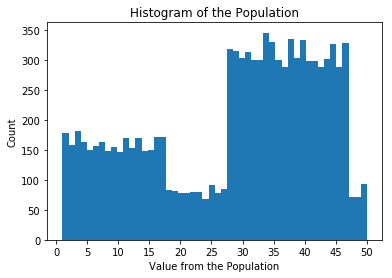

population mean  28.7266


In [2]:
import helpers
import numpy as np
%matplotlib inline

population_data = helpers.distribution(50, 10000, 100)
helpers.histogram_visualization(population_data)
print('population mean ', np.mean(population_data))

# 从人口中抽样

下一个代码单元格将随机从总体中选择N个数据点。这N个数据点将被称为样本。我们使用numpy库的random.choice方法随机选择N个值，你可以在 [这里](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html) 读取这些值。

运行下面的代码单元格，查看一些示例输出。该代码从总体中随机抽取10个数据点，制作一个大小为10的样本。

In [3]:
def random_sample(population_data, sample_size):
    return np.random.choice(population_data, size = sample_size)

random_sample(population_data, 10)

array([30, 12, 38,  5, 13, 43, 34,  4, 32, 20])

# 计算样本均值

接下来我们将使用numpy库来计算每个随机生成的样本的平均值。

In [4]:
def sample_mean(sample):
    return np.mean(sample)

# take a sample from the population
example_sample = random_sample(population_data, 10)

# calculate the mean of the sample and output the results
sample_mean(example_sample)

32.5

# 中心极限定理结果

现在，我们将使用random_sample（）函数和sample_mean（）函数来演示中心极限定理是如何运用的。

下面的代码包含一个for循环，该循环会制作一个大小为N的随机样本，然后取样本的均值，并将该均值存储在列表中。 for循环的每次迭代都会有一个不同的随机样本。研究下面的代码，然后运行该单元格。

In [5]:
###
# Code for showing how the central limit theorem works.
# The function inputs:
# population - population data
# n - sample size
# iterations - number of times to draw random samples

def central_limit_theorem(population, n, iterations):
    sample_means_results = []
    for i in range(iterations):
        # get a random sample from the population of size n
        sample = random_sample(population, n)
        
        # calculate the mean of the random sample 
        # and append the mean to the results list
        sample_means_results.append(sample_mean(sample))
    return sample_means_results

print('Means of all the samples ')
central_limit_theorem(population_data, 10, 10000)

Means of all the samples 


[27.399999999999999,
 28.899999999999999,
 25.699999999999999,
 22.300000000000001,
 35.0,
 25.600000000000001,
 32.200000000000003,
 26.699999999999999,
 29.800000000000001,
 25.699999999999999,
 20.399999999999999,
 27.300000000000001,
 33.200000000000003,
 21.0,
 29.899999999999999,
 29.5,
 29.899999999999999,
 32.799999999999997,
 26.699999999999999,
 27.300000000000001,
 24.0,
 30.5,
 25.5,
 38.600000000000001,
 22.600000000000001,
 29.300000000000001,
 24.800000000000001,
 31.100000000000001,
 30.0,
 37.200000000000003,
 30.899999999999999,
 22.399999999999999,
 27.399999999999999,
 31.5,
 34.100000000000001,
 31.100000000000001,
 18.800000000000001,
 26.100000000000001,
 36.100000000000001,
 31.0,
 18.600000000000001,
 39.399999999999999,
 21.699999999999999,
 30.300000000000001,
 24.399999999999999,
 29.300000000000001,
 35.399999999999999,
 32.799999999999997,
 33.5,
 21.699999999999999,
 30.600000000000001,
 27.800000000000001,
 23.699999999999999,
 30.800000000000001,
 28.80

# 将结果可视化 —— 样本容量= 30

下一个单元格将计算每个大小为30的一万个样本的均值，然后使用直方图将样本均值可视化。需要注意的是，这个可视化结果大致与高斯分布类似。

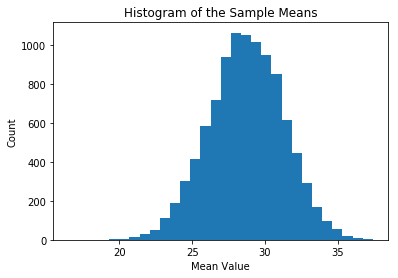

In [6]:
import matplotlib.pyplot as plt

def visualize_results(sample_means):

    plt.hist(sample_means, bins = 30)
    plt.title('Histogram of the Sample Means')
    plt.xlabel('Mean Value')
    plt.ylabel('Count')

# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 30, 10000)

# Visualize the results
visualize_results(sample_means_results)

所以我们刚开始使用的人口样本肯定不符合高斯分布。但是，通过对分布样本进行抽样并计算样本均值，我们最终会看到一些看起来像高斯分布的东西。

# 将结果可视化 —— 样本容量= 1

根据中心极限定理，样本容量需要足够大。一般的经验法则是样本容量应该大于或等于30。让我们尝试使用不同的样本容量来查看会有什么不同的结果。

一个比较夸张的情况是样本容量为1。它的分布应该与原始人口的分布类似。运行下面的代码，查看结果。

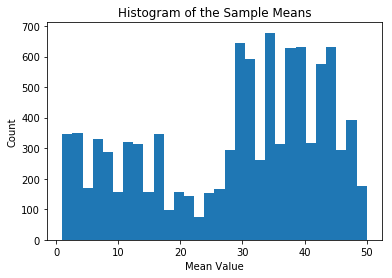

In [7]:
# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 1, 10000)

# Visualize the results
visualize_results(sample_means_results)

# 将结果可视化 ——**样本**容量= 10

现在，我们使用建议的最小样本容量，即30，看看会发生什么。

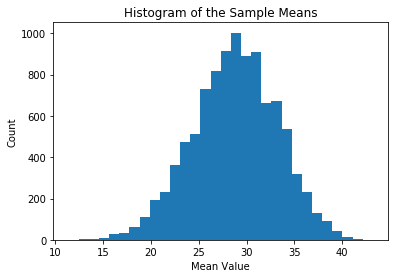

In [8]:
# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 10, 10000)

# Visualize the results
visualize_results(sample_means_results)

样本容量为10时，样本均值的分布看起来类似高斯分布。

# 将结果可视化 —— 样本容量= 1000

让我们继续尝试，并使用更大的样本容量：这次为1000。

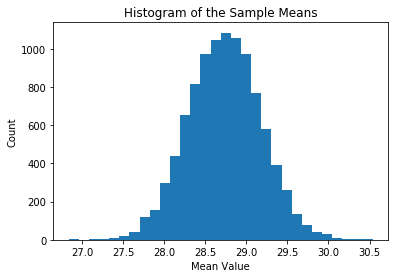

In [9]:
# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 1000, 10000)

# Visualize the results
visualize_results(sample_means_results)

这个结果不仅看起来类似高斯分布，而且你可以看到另一种趋势：数据的离散性（即标准差）随着样本容量的增加而减小。

# 将结果可视化 —— 样本容量= 10000

如果样本容量等于人口数量，会发生什么情况？因为我们[随机抽样进行替换](http://stattrek.com/statistics/dictionary.aspx?definition=Sampling_with_replacement)，所以其中一个样本不太可能是完全的人口数据；然而，由于每个样本可能与人口相似，因此标准差应该进一步降低。

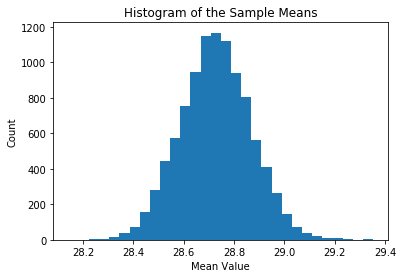

In [10]:
# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 10000, 10000)

# Visualize the results
visualize_results(sample_means_results)

# 结论 
我们还要注意，这些分布的中心接近原始人口均值。

想一想是否要收集现实世界中的数据。如果你想找到世界各地人口的身高分布，你可以测量每个人的身高并分析结果。如果使用该结果的均值，那么你将获得真实的人体高度平均值；然而，要使用这个办法去衡量整个世界人口是不可行的。

相反，你可以使用身高的一个样本。如果只测量了三十人，你的抽样均值可能会与人口平均值相差较大。但是，如果测量了20亿个随机选择的人，那么样本均值可能更接近人口均值。你的样本越大，样本均值就越可能与真实的人口均值相匹配。